# Performance Analysis of Low-Flux Least-Squares Single-Pixel Imaging
## by D. Shin, J. H. Shapiro, V. K. Goyal

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.misc import imread
% matplotlib inline
import time

def mse_asymptotic(x,n,m,p):
    return (((n-2)*p+1)/float(n*p+1-p))*(n*sum(x)/float((1-p)*m))

def mse_proposed(x,n,m,p):
    return (n-1)*sum(x)/((1-float(p))*(m-n))


## - Comparison of MSE estimators with truth

In [28]:

# values of (n,p) pairs
np_pair = [(100,0.2), (100,0.5), (100,0.8), (20,0.2), (20,0.5), (20,0.8)]

# values of q (compression ratio)
v_q = np.linspace(0.1,0.9,20)


n_monte = 500 # can be larger

print 'num. monte carlo trials for true MSE = '+str(n_monte)
print ''

save_logmse = []
save_logmse_approx = []
save_logmse_proposed = []
v_t_mc = []
v_t_approx = []
v_t_proposed = []

for np_val in np_pair:
    
    n = np_val[0]
    p = np_val[1]    
    print '* signal dimension =  '+str(n)
    print '* modulation prob  =  '+str(p)
    print ''

    x = np.random.rand(n)*10
    
    v_mse_proposed = []
    v_mse_approx = []
    v_mse = []
    for q in tqdm(v_q):
        m = int(n/q)

        t = time.time()
        v_monte_mse = []
        for i in range(n_monte):
            A = (np.random.rand(m,n)<p).astype(float)
            y = np.random.poisson(np.array(np.matrix(A)*np.matrix(x).T))
            x_est = np.array((np.matrix(np.linalg.pinv(A))*y).T)[0]
            v_monte_mse.append(np.linalg.norm(x_est-x)**2) 
        val_mc = np.mean(v_monte_mse)
        t_mc = time.time()-t
        
        t = time.time()
        val_approx = mse_asymptotic(x,n,m,p)
        t_approx = time.time()-t
        
        t = time.time()
        val_proposed = mse_proposed(x,n,m,p)
        t_proposed = time.time()-t
        
        v_mse.append(val_mc)
        v_mse_approx.append(val_approx)
        v_mse_proposed.append(val_proposed)
        v_t_mc.append(t_mc)
        v_t_approx.append(t_approx)
        v_t_proposed.append(t_proposed)
        
    v_logmse = np.log10(v_mse)
    v_logmse_approx = np.log10(v_mse_approx)
    v_logmse_proposed = np.log10(v_mse_proposed)    
    # append errors
    save_logmse.append(v_logmse)
    save_logmse_approx.append(v_logmse_approx)
    save_logmse_proposed.append(v_logmse_proposed)
    
print 'finished simulation'


  0%|          | 0/20 [00:00<?, ?it/s]

num. monte carlo trials for true MSE = 500

* signal dimension =  100
* modulation prob  =  0.2



  0%|          | 0/20 [00:00<?, ?it/s]

* signal dimension =  100
* modulation prob  =  0.5



  0%|          | 0/20 [00:00<?, ?it/s]

* signal dimension =  100
* modulation prob  =  0.8



  0%|          | 0/20 [00:00<?, ?it/s]

* signal dimension =  20
* modulation prob  =  0.2



  0%|          | 0/20 [00:00<?, ?it/s]

* signal dimension =  20
* modulation prob  =  0.5



  0%|          | 0/20 [00:00<?, ?it/s]

* signal dimension =  20
* modulation prob  =  0.8



100%|██████████| 20/20 [00:03<00:00,  7.42it/s]

finished simulation


In [29]:
# times?

t_mean_mc = sum(v_t_mc)
t_mean_approx = sum(v_t_approx)
t_mean_proposed = sum(v_t_proposed)

print 't mc       = '+str(t_mean_mc)+ 'seconds'
print 't approx   = '+str(t_mean_approx)+ 'seconds'
print 't proposed = '+str(t_mean_proposed)+ 'seconds'


t mc       = 181.844005108seconds
t approx   = 0.0022656917572seconds
t proposed = 0.00110769271851seconds


In [30]:
dd = {'np_pair':np_pair,'v_q':v_q,\
      'save_logmse':save_logmse,'save_logmse_approx':save_logmse_approx,'save_logmse_proposed':save_logmse_proposed,\
     }

np.save('results/results.npy', dd) 


In [31]:

dd = np.load('results/results.npy').item()
np_pair = dd['np_pair']
v_q = dd['v_q']
save_logmse = dd['save_logmse']
save_logmse_approx = dd['save_logmse_approx']
save_logmse_proposed = dd['save_logmse_proposed']



signal dimension =  100
modulation prob  =  0.2



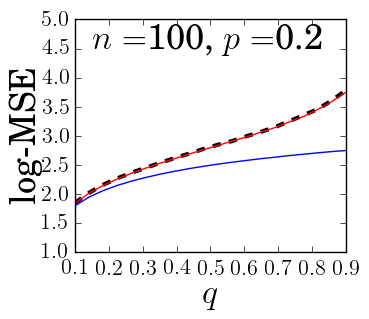

signal dimension =  100
modulation prob  =  0.5



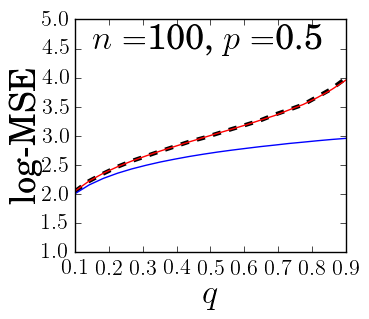

signal dimension =  100
modulation prob  =  0.8



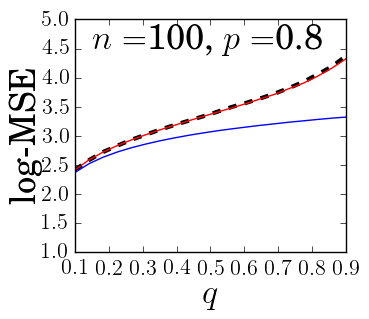

signal dimension =  20
modulation prob  =  0.2



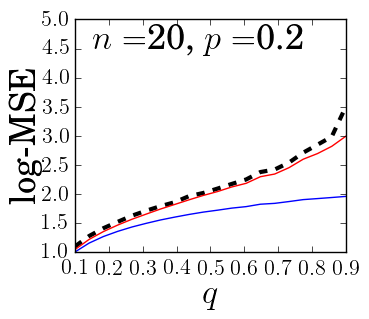

signal dimension =  20
modulation prob  =  0.5



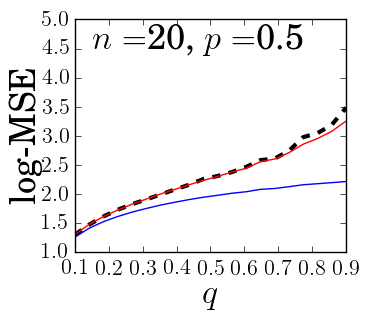

signal dimension =  20
modulation prob  =  0.8



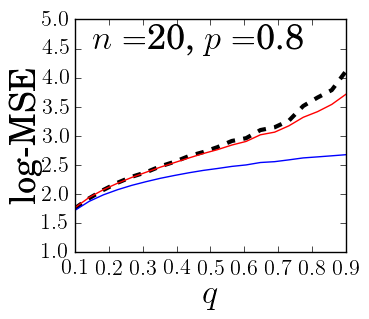

In [33]:
# load



is_save = 1
is_save_plot = 1



plt.rc('text', usetex=True)
plt.rc('font', family='serif')

limx = [0.1,0.9]
limy = [1,5]
fgsz = (3.5,3)

for i in range(len(np_pair)):
    n_val = np_pair[i][0]
    p_val = np_pair[i][1]
    
    print 'signal dimension =  '+str(n_val)
    print 'modulation prob  =  '+str(p_val)
    print ''
    
    plt.figure(figsize=fgsz)
    plt.hold('true')
    plt.plot(v_q,save_logmse[i],'k--',linewidth=3,ms=5)
    plt.plot(v_q,save_logmse_approx[i],'b-',ms=5)
    plt.plot(v_q,save_logmse_proposed[i],'r-',ms=5)
    plt.xlabel(r'$q$',fontsize=25,labelpad=-1)
    plt.ylabel(r'log-MSE',fontsize=25,labelpad=-0.5)
    #plt.title(r'$n=$'+str(n_val)+', $p=$'+str(p_val), fontsize=15)
    plt.text(0.15,4.5,r'$n=$'+str(n_val)+', $p=$'+str(p_val),\
             fontsize=25,horizontalalignment='left',fontweight='bold')
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.xlim(limx)
    plt.ylim(limy)
    if(is_save_plot):
        plt.savefig('results/results_sim_n'+str(n_val)+'_p'+str(p_val)+'.eps', format="eps",bbox_inches='tight')
    plt.show()


In [ ]:

import time
t = time.time()

